<a href="https://colab.research.google.com/github/armandordorica/Advanced-Python/blob/master/coding_challenges/Critical_Connections_in_a_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are `n servers` numbered from `0` to `n-1` connected by undirected server-to-server connections forming a network where `connections[i] = [a, b]` represents a connection between servers a and b. Any server can reach any other server directly or indirectly through the network.

* A critical connection is a connection that, if removed, will make some server unable to reach some other server.

* Return all critical connections in the network in any order.

**Sample Input/Output**
* Input: `n = 4`, `connections = [[0,1],[1,2],[2,0],[1,3]]`
* Output: `[[1,3]]`

Explanation: `[[3,1]]` is also accepted.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations 


n = 4
input_edges = [[0,1],[1,2],[2,0],[1,3]]

In [2]:
connections = [tuple(l) for l in input_edges]

In [3]:
# Create graph
G = nx.Graph()
# Fill graph with data
G.add_edges_from(connections)

# Get all simple paths from node 'a' to node 'i'
# list(nx.all_simple_paths(G, '0', '1'))

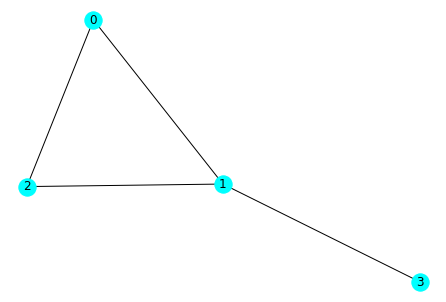

In [4]:
nx.draw(G, node_color="cyan", with_labels = True)
plt.show() # display

In [5]:
arr = list(G.nodes)
r = 2
possible_connections = list(combinations(arr, r)) 
print("Possible connections: {}".format(possible_connections))

Possible connections: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [6]:
critical_connections = []

for i in range(0, len(possible_connections)):
  a= possible_connections[i][0]
  b= possible_connections[i][1]
  print("Connection: {} to {}".format(a, b))
  paths = list(nx.all_simple_paths(G, a, b))

  print(paths)
  if len(paths) <= 1: 
    critical_connections.append(paths)


flat_list = [item for sublist in critical_connections for item in sublist]

critical_connections = flat_list


print("Critical connections:{}".format(critical_connections))

Connection: 0 to 1
[[0, 1], [0, 2, 1]]
Connection: 0 to 2
[[0, 1, 2], [0, 2]]
Connection: 0 to 3
[[0, 1, 3], [0, 2, 1, 3]]
Connection: 1 to 2
[[1, 0, 2], [1, 2]]
Connection: 1 to 3
[[1, 3]]
Connection: 2 to 3
[[2, 1, 3], [2, 0, 1, 3]]
Critical connections:[[1, 3]]


In [7]:
def get_critical_connections(input_edges):
  connections = [tuple(l) for l in input_edges]
  G = nx.Graph()
  # Fill graph with data
  G.add_edges_from(connections)

  arr = list(G.nodes)
  r = 2
  possible_connections = list(combinations(arr, r)) 
  print("Possible connections: {}".format(possible_connections))

  critical_connections = []

  for i in range(0, len(possible_connections)):
    a= possible_connections[i][0]
    b= possible_connections[i][1]
    print("Connection: {} to {}".format(a, b))
    paths = list(nx.all_simple_paths(G, a, b))

    print(paths)
    if len(paths) <= 1: 
      critical_connections.append(paths)


  flat_list = [item for sublist in critical_connections for item in sublist]

  critical_connections = flat_list

  return critical_connections

In [8]:
get_critical_connections(input_edges)

Possible connections: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
Connection: 0 to 1
[[0, 1], [0, 2, 1]]
Connection: 0 to 2
[[0, 1, 2], [0, 2]]
Connection: 0 to 3
[[0, 1, 3], [0, 2, 1, 3]]
Connection: 1 to 2
[[1, 0, 2], [1, 2]]
Connection: 1 to 3
[[1, 3]]
Connection: 2 to 3
[[2, 1, 3], [2, 0, 1, 3]]


[[1, 3]]

In [9]:
list(nx.all_simple_paths(G, 0, 1))

[[0, 1], [0, 2, 1]]

In [10]:
G.nodes

NodeView((0, 1, 2, 3))

In [11]:
for start in G.nodes:
    for end in G.nodes:
        if start != end:
            print(list(nx.all_simple_paths(G, start, end)))

[[0, 1], [0, 2, 1]]
[[0, 1, 2], [0, 2]]
[[0, 1, 3], [0, 2, 1, 3]]
[[1, 0], [1, 2, 0]]
[[1, 0, 2], [1, 2]]
[[1, 3]]
[[2, 1, 0], [2, 0]]
[[2, 1], [2, 0, 1]]
[[2, 1, 3], [2, 0, 1, 3]]
[[3, 1, 0], [3, 1, 2, 0]]
[[3, 1]]
[[3, 1, 0, 2], [3, 1, 2]]


# Dijkstra's Shortest Path Algorithm
Begin with two lists: 
`visited = []` - empty list 
`unvisited = []` - contains all the nodes

1. Visit the unvisited vertex with the smallest known distance from the start vertex. 